# Christine's Code - Google Price Prediction (RNN)

In [1]:
# LSTM model in part 2
# Note - "Random Walk" theory => We actually cannot predict the exact future price, as variations of past and future and independent.
# Predict trends

# Part 1:  Import Packages

In [2]:
#@title Check GPU

import tensorflow as tf
device_name = tf.test.gpu_device_name

str(device_name)
# if device_name != '/device:GPU:0':
#     print('GPU device NOT found')
# else:
#     print('Found GPU at: {}'.format(device_name))

'<function gpu_device_name at 0x1352a3ba0>'

In [3]:
# Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# SK Learn
from sklearn.preprocessing import MinMaxScaler

In [4]:
# Import the TRAIN dataset
dataset_train = pd.read_csv('/Users/christine/VSCode/deeplearningcourse_remote/deeplearningcourse/Part 3 - Recurrent Neural Networks/Google_Stock_Price_Train.csv')

In [5]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [7]:
# We are only using Open and High Column for our RNN model:
# [,1:2] - we are only taking only Open Column and we need a flatten array, easiest way is this method
# Note that it can only pass values, and we need a flatten array (n,1)
training_set = dataset_train.iloc[:, 1:2].values

In [8]:
training_set.shape

(1258, 1)

In [9]:
# Feature Scaling - fit and transformation later on
# But we also need to specify the transformation.

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1)) # defaults to setting 0-1 as the bounds for the values, not sure why instructor typed it.

# The scale step will fail if it's not in the (n,1) shape
training_set_scaled = sc.fit_transform(training_set)

# Refresher:
# Fit --> Calculate statistics like mean, and tell model to learn from training set
# Transform --> Apply transformations, like scaling

In [10]:
# Train Scale
training_set_scaled.shape

#All prices are now between 0 and 1.
# Normalize - Min/Max Scaler
# Standardization - fitting like normal distribution

(1258, 1)

In [11]:
# Make Data Structure with 60 time-steps and 1 output
# The RNN will look at the past 60 time-steps, from T-59 up to T.
# It will use these past 60 time-steps to predict the next time-step, T+1.
# T is the current time-step, and the model predicts the value for T+1 (the next time-step).


# initiailizations
# Unlike other models, we start them empty and append
X_train = []
y_train = []

In [12]:
# For loop, and the 60 time steps:
for i in range(60, 1258): # Start at the 60th time-steps
    
    # First 60 time-steps, i.e. first observation is [0:60, 0] --> t is 60th observation, so t+1 = 61
    # Rows 0 to 59
    X_train.append(training_set_scaled[i-60:i, 0])
    
    # 60th observation or i = 60 is retrieved as the output y-train will grab row 60
    # which is what it's told to PREDICT the 60th observation, which we pass in.
    y_train.append(training_set_scaled[i, 0])
    
    # Memorize first 60 time-steps, and then view the result for the t+1 


In [13]:
# Make numpy arrays for X_train and y_train
# Just pass numpy.array np.array
X_train, y_train = np.array(X_train), np.array(y_train)

In [14]:
# Notice the shape.
# 1198 rows - why?
# Rolling Window - t+1 is the prediction target, you take the previous 60 days beforehand.
# Each window is moving. See diagram.

X_train.shape

(1198, 60)

In [15]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [16]:
X_train.shape[0]

1198

In [17]:
# Reshape required - because we are building the first layer, base RNN layer
# Input, from X_train required(batch_size, timesteps, features)
# 0 = rows, 1 = columns
# X_train variable, the , number of indicators (predictor variables)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# 1198 observations, 60 timesteps, 1 feature ^

# Part 2: Build the RNN (set up, layers, params, etc.)

In [18]:
# Build the RNN
import tensorflow as tf

In [19]:
# Import the packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout


In [20]:
# Initialize the RNN
# Since we need a number or continous value, we use Regression
regressor = Sequential()

In [21]:
# Dropout Regularization - penalize overfitting
# Stacked LSTM 
# input_shape - the shape of the X_train input we made, of the tensor 3D we did previously
# Dropout = drop 20% of the neurons in this layer. Randomly selected neurons.
# Dropout can happen at the input layer, or the recurrent connections (hidden state layers)
 

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2)) # 10 neurons will be dropped.

# 50 neurons or LSTM units for learning
# input_shape, refer to documentation, this is the shape required to pass in. Pass in the # of time-steps (60) + num of features
# Return Sequence = 

/Users/christine/VSCode/deeplearningcourse_remote/deeplearningcourse/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
# Add 2nd layer - REMOVE the input shape, since we are not inputting anything from the input layer.
# We don't need to specify input layer shape. 
# The model recognizes 50 units from the previous layer.
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2)) # 10 neurons will be dropped.

In [23]:
# Add 3rd layer - REMOVE the input shape, since we are not inputting anything from the input layer.
# We don't need to specify input layer shape. 
# The model recognizes 50 units from the previous layer.
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2)) # 10 neurons will be dropped.

In [24]:
# Add 4th layer - REMOVE the input shape, since we are not inputting anything from the input layer.
# We don't need to specify input layer shape. 
# The model recognizes 50 units from the previous layer.
# return_sequence = False, since the layer is no longer stacked, and output layer is the final layer.

# Since it's last LSTM layer, we are not returning any more sequences, since the layer does not require to do sequential learning anymore.
# The shape is now (number of batches, number of neurons)

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2)) # 10 neurons will be dropped.

In [25]:
# Add the 4th output layer.
# Needs to be dense, since its fully connected with previous layer.
regressor.add(Dense(units = 1))

### Compile RNN, evaluation with regression metrics (MAE, RMSE, MSE R2):

In [26]:
regressor.compile(optimizer= "RMSprop", loss = "mean_squared_error")

# Adam = Stochastic Gradient Descent - updates relevant updates to weights
# Loss = MSE
# RMSprop is usually recommended for RNN

In [27]:
# Fit using the right variable, X_train
regressor.fit(X_train, y_train, epochs= 100, batch_size= 32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0867
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0127
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0104
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0106
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0089
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0075
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0075
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0075
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0063
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0068
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0063
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0074
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0059
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0057
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - lo

In [28]:
# Our RNN is now trained!
# The loss is reduced at each iteration.
# Loss is declining in reduction over time.

# Part 3: Making predictions, visualizing results from RNN

In [29]:
# Read CSV:
dataset_test = pd.read_csv('/Users/christine/VSCode/deeplearningcourse_remote/deeplearningcourse/Part 3 - Recurrent Neural Networks/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [56]:
# Setup:
# Combine together
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

# This is added on a row-level, so stacked on-top (axis = 0)
# One Column of Open data
# Since test was added at the bottom, the 2017 dates were added there.

In [58]:
# print(len(dataset_total))
# 1278 rows

1278


In [50]:
dataset_total

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [62]:
# Inputs variable: 
# 20 financial days per months is 3 months (60 days = 20 x 3)
# 1258 (len dataset_total) - 19 (dataset_test)==> this will grab all the original rows from the train dataset
# minus 60 -> LSTM needs to look at 60 observations prior to make predictions. That's how the model works.
# "priming"
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values


In [63]:
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [64]:
# Reshape required
inputs = inputs.reshape(-1,1)

# Why?
# np.reshape(row,col) --> col = 1 (since we need a flattened array)
# rows = -1 --> tells numpy to figure out how many rows there are based on the np structure

In [65]:
inputs

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [66]:
# Transformation required - repeat what you did for X_train dataset
# Min Max Scaler:
inputs = sc.transform(inputs)

In [67]:
# X-Test
X_test = []

In [68]:
# Use a For-Loop:
# The X_test only contains 20 financial days, so we are only getting the 20 days results in the X_test.
# Record the rolling windows:
# We must take it from inputs var, since it's scaled.
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0]) # add to inputs 

In [70]:
len(X_test) # 20 days of rolling window

20

In [71]:
# X_Test
X_test = np.array(X_test) # convert to numpy
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) # This is the shape required to pass to LSTM.predict()

# What is required in X_test - samples, time steps, features
# The XTest var, the tuple of the shape (row,column) and the number of features used
# Samples - X_Test.shape[0], time-steps = X_test.shape[1] and features = 1

# Do the prediction!
predicted_stock_price = regressor.predict(X_test)

# Reverse the transformation of the scale, in order to undo the scaling, so you get the actual stock prices.
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


# Visualize Results:

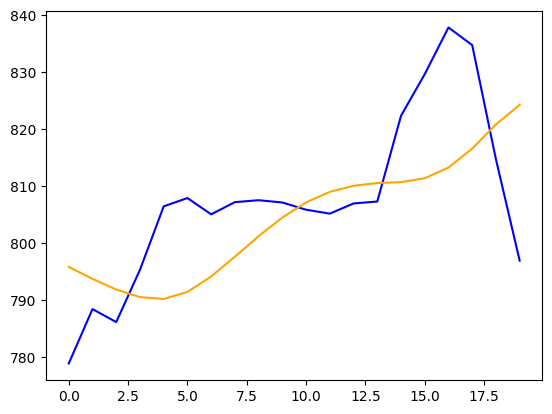

In [74]:
plt.plot(real_stock_price, color = 'blue', label = "Real Google Stock Price")
plt.plot(predicted_stock_price, color = "orange", label = "Predicted Google Stock Price")
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# Comments:

* We see some lag in some times, since we cannot react to non-linear changes
* Brownian Motion and Random Walk theory, random variation in future, we cannot predict it necessarily.
* Our model reacts OK to new changes, which is good.

* We pick up the general trend, which is good news.

* Boltzmann Machine + SOM - PyTorch

# Suggestions - Improving the LSTM model for the future:

* Add more LSTM layers - try adding more than 4
* Add more neurons for the LSTM layers
* Add more training data instead of last 5 years
* Increase time-steps (how far previous it looks), so it could potentially pick up more patterns
* Add more indicators (feature engineering; i.e. Airbnb dataset, remember how you find distance data!)